### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

## Импорт основных библиотек

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline 
'''указывает, что график необходимо построить все в той же оболочке Jupyter, 
но теперь он выводится как обычная картинка. Данный способ удобен тем, 
что позволяет проводить очень много экспериментов в рамках одного окна (точнее web-страницы).'''


'указывает, что график необходимо построить все в той же оболочке Jupyter, \nно теперь он выводится как обычная картинка. Данный способ удобен тем, \nчто позволяет проводить очень много экспериментов в рамках одного окна (точнее web-страницы).'

## Импорт набора данных Boston из sklearn

In [58]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## Давайте сначала сохраним исходные данные и целевые значения в некоторые переменные, прежде чем изменять их.

In [59]:
X = boston_dataset.data
y = boston_dataset.target

### Теперь давайте конвертируем данные в pandas DataFrame и немного исследуем их.

In [60]:
boston_dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Входные данные, которые являются нашими обучающими данными, имеют 13 различных функций в виде столбцов и 506 экземпляров каждой из них.

In [193]:
!pip install --user numpy==1.20.1
!pip install --user pandas==1.3

In [61]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Мы можем ясно видеть неравномерный масштаб данных, поскольку мы собираемся реализовать градиентный спуск, который при неправильном масштабе требует много времени для достижения оптимального значения параметров, поэтому нам необходимо масштабировать данные.

In [62]:
scale = StandardScaler()
boston_dataset = scale.fit_transform(X)
#поскольку StandardScaler возвращает вывод в форме массива numpy, 
#нам нужно снова преобразовать его в фрейм данных с точными именами столбцов.
boston_dataset = pd.DataFrame(boston_dataset, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


## Выглядит лучше! Теперь, прежде чем применять градиентный спуск, нам нужно будет добавить столбец в набор данных со всеми значениями, равными 1, зачем нужен дополнительный столбец? потому что для каждой характеристики (x1, x2, x3…) есть параметр (weight-m1, m2, m3…) в векторе параметров (Θ). Мы также должны позаботиться о смещении (b) в (y = m1.x1 + m2.x2 +…. + 'b') для каждой функции x [j]. Точно так же в векторе параметров будут все веса (m1, m2…) для каждой функции и вес для члена смещения «b».

In [63]:
boston_dataset['bias']=1
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1


## Теперь разделим данные на обучающие и тестовые.

In [64]:
#from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(boston_dataset, y, test_size = 0.2, random_state = 42)

# ⇓⇓⇓ ТУТ ДАТАСЕТ БЕЗ ПРЕДВАРИТЕЛЬНОЙ ОБРАБОТКИ ⇓⇓⇓

In [134]:
#from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# ⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑⇑

## Мы выполнили небольшую необходимую предварительную обработку, давайте напишем код, который будет использовать градиентный спуск для оптимизации параметров, чтобы минимизировать функцию затрат.

## Прежде чем перейти к кодированию, давайте обсудим суть этого алгоритма.

## Основная идея градиентного спуска - итеративно настраивать параметры, чтобы минимизировать функцию затрат. Градиентный спуск измеряет локальный градиент функции ошибок относительно вектора параметров Θ, и он идет в направлении нисходящего градиента. Как только градиент равен нулю, мы достигли минимума.

## Как нам начать здесь? мы начинаем с ввода некоторых случайных значений в вектор Θ (содержащий веса m1, m2…), это также называется случайной инициализацией. Мы вычисляем функцию стоимости, используя случайно инициализированный Θ. Мы обязательно получим очень нежелательную и большую сумму MSE (стоимость). Затем мы будем постепенно улучшать его, делая крошечные шаги за один раз, стремясь уменьшить функцию стоимости, пока она в конечном итоге не сойдется к минимальному значению.

## Еще одна важная вещь, на которую следует обратить внимание, - это очень важный тип, называемый скоростью обучения, который обозначается Eta (η). Это гиперпараметр в Gradient Descent, который в основном контролирует, сколько спуска (постепенный шаг к минимуму - посмотрите на рисунок выше) мы должны сделать на каждом шаге от текущего значения градиента. Становится ясно, что, если вы думаете, что чем меньше η, алгоритму потребуется больше времени, чтобы сойтись к минимуму (или большему количеству итераций / шагов), аналогично, чем больше η, он может сходиться быстрее, но также имеет риск отскочить от другая сторона кривой.

# Создаем обьект класса градиентного спуска

In [156]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.5, fit_intercept= True, random_state= 42)

# Создадим переменные для выполнения задания

# Напишем функцию градиентного спуска и построим его график

[0.86192385 0.12646903 0.85569663 0.73256918 0.43158418 0.56306387
 0.45351583 0.57632141 0.46469037 0.5791294  0.81407219 0.00342281
 0.19198945]
Количество весовых коэффициентов:  13
Количество шагов :  999
Значение последней предыдущией ошибки и последней ошибки :  6.774370525234088e+33 6.779724205474997e+33
Длинна списка ошибок : 1000


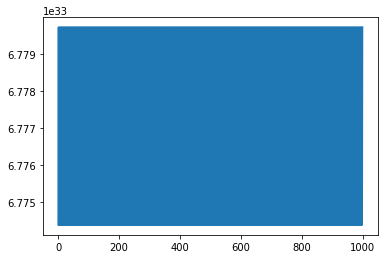

In [160]:
# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
rmse_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 7 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_squared_error(y_test, sgd_regressor.predict(X_test))
    rmse_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',rmse_evo[-2], current_error)
print('Длинна списка ошибок :', len(rmse_evo))
   
plt.plot(rmse_evo)
plt.show()

### У нас произошла ошибка. По каким причинам? Сравним все имеющиеся данные и выясним почему так происходит и что с нашей моделью.

# И так наша переменная eta0 = 0.5 (отвечает за изменение при каждом шаге градиентного спуска), epsilon = 7, при этом значение последней ошибки равняется - 6.779724205474997e+33. Отсюда вопрос почему же на сработал выход из цикла "if weight_evo[-1] < epsilon:" ???

## Поэксперементируем дальше...

In [163]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.9, fit_intercept= True, random_state= 42)

[0.65288536 0.56667995 0.63040711 0.80255428 0.06636908 0.98908046
 0.95499474 0.92643765 0.45552907 0.29157207 0.90260413 0.65701737
 0.95252662]
Количество весовых коэффициентов:  13
Количество шагов :  999
Значение последней предыдущией ошибки и последней ошибки :  5.9491147279573015e+34 2.9576682236188422e+34
Длинна списка ошибок : 1000


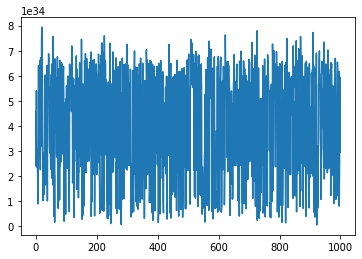

In [166]:
# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
rmse_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 7 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_squared_error(y_test, sgd_regressor.predict(X_test))
    rmse_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',rmse_evo[-2], current_error)
print('Длинна списка ошибок :', len(rmse_evo))
   
plt.plot(list(rmse_evo))
plt.show()

## Тут мы указали параметры eta0= 0.9 и epsilon = 7. Мы видим, что значения последней ошибки и предпоследней "5.94" и "2.95", ошибка все еще большая, но поему не остановился цикл?
### Так же видим на графике, что наша ошибка то взлетает до 8 то тут же падает до значений от 0 до 1.

[0.39932967 0.09250633 0.50223764 0.08083317 0.33410931 0.35380229
 0.01504775 0.1742183  0.92122732 0.34718523 0.7881932  0.52610711
 0.15155755]
Количество весовых коэффициентов:  13
Количество шагов :  999
Значение последней предыдущией ошибки и последней ошибки :  2.6965624086954013e+32 2.725780339452428e+32
Длинна списка ошибок : 1000


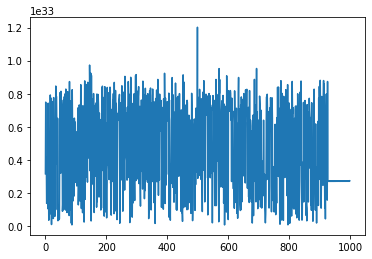

In [173]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.1, fit_intercept= True, random_state= 42)

# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
rmse_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 0.01 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_squared_error(y_test, sgd_regressor.predict(X_test))
    rmse_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',rmse_evo[-2], current_error)
print('Длинна списка ошибок :', len(rmse_evo))
   
plt.plot(list(rmse_evo))
plt.show()

### Как видим изменений нет. А что на счет длины списка ошибок и количества шагов? Тут мы видим что у нас всегда 999 шагов,пичем у нас не выполняется условие выхода из цикла. И длинна списка ошибок тоже всегда не меняется она равна 1000. Тут я предполагаю, что цикл зацтклившись заканчивается на 999 итерации но при этом длинна списка ошибок должна быть тоже 999. Почему так происходит? 

### Идем дальше...ранее в коде я использовал преобразование данных "StandardScaler", использаем эти данные и добавленный биос и проверим нашу SGD Regression

[0.00385218 0.29046099 0.78971492 0.98503007 0.36878591 0.45409864
 0.2790579  0.08536691 0.46333994 0.6438573  0.22272816 0.84808084
 0.54097204 0.87616988]
Количество весовых коэффициентов:  14

Итерации остановлены на шаге 174
Количество шагов :  174
Значение последней предыдущией ошибки и последней ошибки :  24.284506351560452 24.284170864127205
Длинна списка ошибок : 174


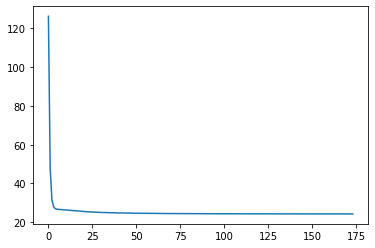

In [23]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.001, fit_intercept= True, random_state= 42)

# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
rmse_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 0.001 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_squared_error(y_test, sgd_regressor.predict(X_test))
    rmse_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',rmse_evo[-2], current_error)
print('Длинна списка ошибок :', len(rmse_evo))
   
fig, ax = plt.subplots()
ax.plot(range(step), rmse_evo, label = 'd')
plt.show()

[0.74907388 0.49267504 0.38381596 0.92657426 0.14413881 0.30843288
 0.12992506 0.90734107 0.24003806 0.25348139 0.19517817 0.40951363
 0.09333779 0.81207769]
Количество весовых коэффициентов:  14

Итерации остановлены на шаге 856
Количество шагов :  856
Значение последней предыдущией ошибки и последней ошибки :  24.466944297876534 24.46648870909355
Длинна списка ошибок : 856


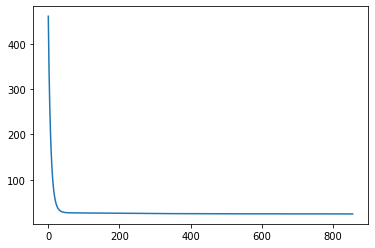

In [27]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.00009, fit_intercept= True, random_state= 42)

# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
rmse_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 0.001 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_squared_error(y_test, sgd_regressor.predict(X_test))
    rmse_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',rmse_evo[-2], current_error)
print('Длинна списка ошибок :', len(rmse_evo))
   
fig, ax = plt.subplots()
ax.plot(range(step), rmse_evo, label = 'd')
plt.show()

[0.10740779 0.68903423 0.74396834 0.97898664 0.0394837  0.91406834
 0.8190402  0.53226148 0.72092995 0.09253048 0.21148634 0.51153576
 0.17454459 0.40497245]
Количество весовых коэффициентов:  14

Итерации остановлены на шаге 8
Количество шагов :  8
Значение последней предыдущией ошибки и последней ошибки :  27.522577412576155 27.477029094174338
Длинна списка ошибок : 8


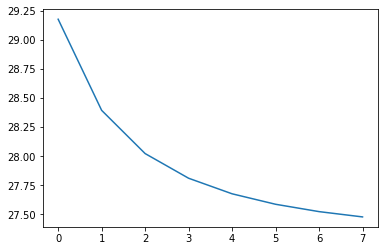

In [37]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.01, fit_intercept= True, random_state= 42)

# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
rmse_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 0.1 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_squared_error(y_test, sgd_regressor.predict(X_test))
    rmse_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',rmse_evo[-2], current_error)
print('Длинна списка ошибок :', len(rmse_evo))
   
fig, ax = plt.subplots()
ax.plot(range(step), rmse_evo, label = 'd')
plt.show()

### И так количество шагов и количество оценок у нас теперь одинаково. Поэксперементировав со значениями мы видим что значение ошибки все еще очень большое.

## MSE лучше применять, когда вы уверены что в выборке нет "выборосов" (англ. outliers) - значений, который очень сильно отличаются от остальных точек. Если выбросы есть, лучше применять MAE.
## Проверим наши данные на выбросы.

In [38]:
boston_dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1


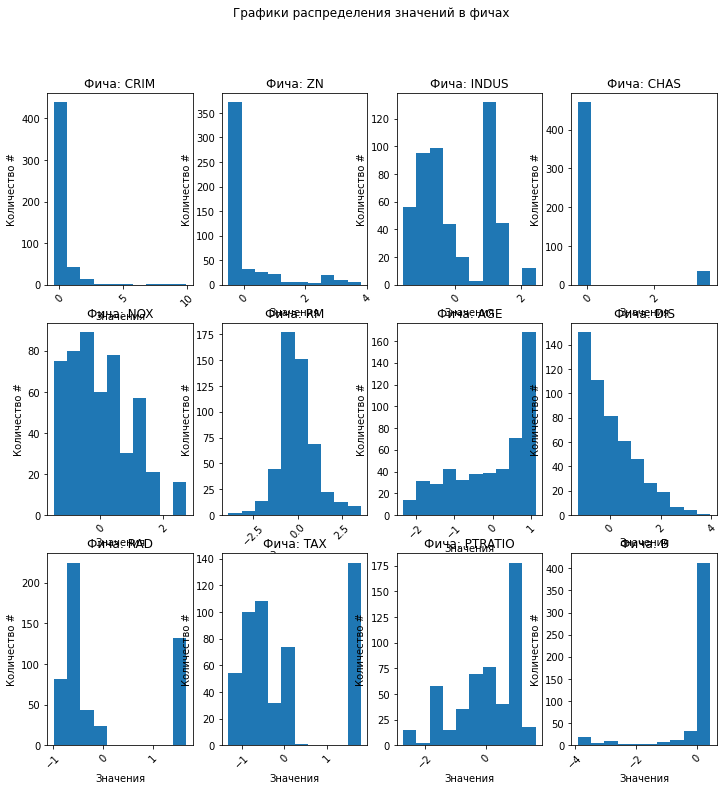

In [48]:
fig, axs = plt.subplots(nrows= 3, ncols= 4, figsize = (12, 12))
data_s = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

row = [0, 1, 2, 3] # для заполнения матрицы 3 Х 4
col = [0, 1, 2]
x = 0 # счетчик для пробежки по массиву с фичами

for i in col:
    for j in row:
        ax = axs[i][j]
        fiture = data_s[x]
        ax.hist(boston_dataset[fiture])
    
        ax.set_title('Фича: ' + fiture)
        ax.set_ylabel('Количество #')
        #ax.set_xticks(list(range(boston_dataset.index.min(), boston_dataset.index.max(), 2)) + [boston_dataset.index.max()])
        ax.tick_params(axis='x', rotation = 45)
        ax.set_xlabel('Значения')
        x += 1
        
fig.suptitle('Графики распределения значений в фичах')
plt.show()

## Как видим из графиков во многих фичах есть вбросы. Поэтому заменими метрику качества с MSE на MAE. 

In [49]:
from sklearn.metrics import mean_absolute_error

[0.21448035 0.63921462 0.53420685 0.55256751 0.26500636 0.71696816
 0.85121566 0.50409017 0.89422915 0.32121193 0.79440441 0.56513514
 0.25311162 0.80104411]
Количество весовых коэффициентов:  14

Итерации остановлены на шаге 174
Количество шагов :  174
Значение последней предыдущией ошибки и последней ошибки :  3.2032063211759065 3.203183543462054
Длинна списка ошибок : 174


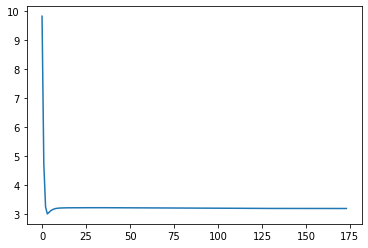

In [54]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.001, fit_intercept= True, random_state= 42)

# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
mae_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 0.001 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_absolute_error(y_test, sgd_regressor.predict(X_test))
    mae_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',mae_evo[-2], current_error)
print('Длинна списка ошибок :', len(mae_evo))
   
fig, ax = plt.subplots()
ax.plot(range(step), mae_evo, label = 'd')
plt.show()

### Как мы видим ошибка стала меньше. Попробуем добавить регуляризацию.

[0.86268717 0.30726951 0.56648642 0.69680709 0.98161016 0.25731644
 0.36902451 0.41853691 0.83434688 0.37240622 0.40167333 0.27655916
 0.91185817 0.95987601]
Количество весовых коэффициентов:  14

Итерации остановлены на шаге 81
Количество шагов :  81
Значение последней предыдущией ошибки и последней ошибки :  3.2113320295965084 3.2110598844048446
Длинна списка ошибок : 81


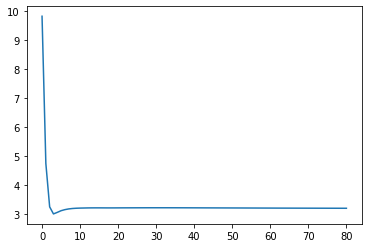

In [69]:
sgd_regressor = SGDRegressor(learning_rate= 'constant', eta0= 0.001, alpha = 0.001, fit_intercept= True, random_state= 42)

# Сделаем 1000 шагов градиентного спуска
weight_evo = [] #Для записи измерения весов
mae_evo = [] #Для измерения ошибки

w_current = np.random.random(X_train.shape[1]) #для записи коефиw, сгенерим начальные веса (по количеству фичей)
epsilon = 0.01 # запись нашего минимума, т.е. на когда наши веса начнуть меняться менее данного числа - то мы нашли мин
print(w_current)
print('Количество весовых коэффициентов: ',len(w_current))

for step in list(range(1000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) #обучаем модельку
    weight_evo.append(distance.euclidean(w_current, sgd_regressor.coef_)) #запоминаем изменение весов от тек знач
    if weight_evo[-1] < epsilon:
        print("\nИтерации остановлены на шаге %d" %step); break # проверка выхода из цикла
    current_error = mean_absolute_error(y_test, sgd_regressor.predict(X_test))
    mae_evo.append(current_error) #считаем ошибку
    w_current = sgd_regressor.coef_.copy()

print('Количество шагов : ', step)
print('Значение последней предыдущией ошибки и последней ошибки : ',mae_evo[-2], current_error)
print('Длинна списка ошибок :', len(mae_evo))
   
fig, ax = plt.subplots()
ax.plot(range(step), mae_evo, label = 'd')
plt.show()

## Чтобы обучить модель, вам необходимо:

### Определите функции: Независимые переменные: X
### Определите метку: зависимая переменная: y
### Построить поезд / испытательный комплекс
### Определите начальный вес
### Определить функцию потерь: MSE
### Оптимизация модели: градиентный спуск
### Определение:
### Скорость обучения
### Количество эпох
### Размер партии